In [36]:
from bokeh.models.widgets import inputs
from tensorflow import keras
model = keras.models.load_model("best-cnn-model.keras")

In [56]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [38]:
conv = model.layers[0]  # 첫번째 레이어를 가지고 온다.
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [39]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())  # 넘파이로 바꿔서 그려본다.

-0.036003146 0.29171273


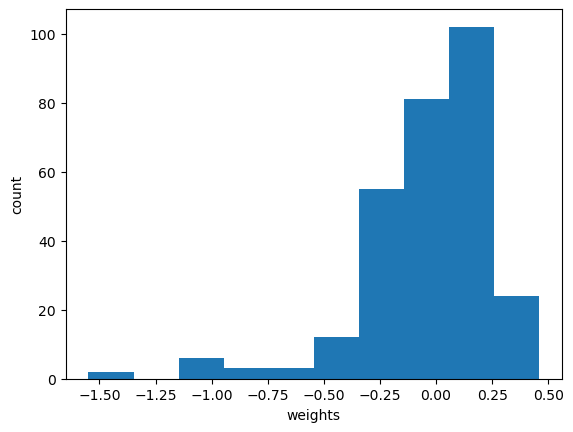

In [40]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weights")
plt.ylabel("count")
plt.show()

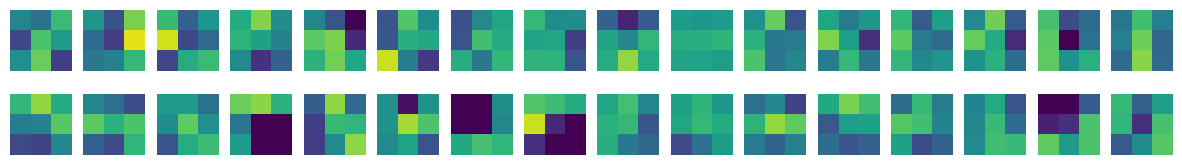

In [41]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis("off")
plt.show()

In [42]:
no_training_model = keras.Sequential()
no_training_model.add(
    keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1)))

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [44]:
no_training_weights = no_training_conv.weights[0].numpy()
no_training_weights.mean(), no_training_weights.std()

(-0.0129660405, 0.08037389)

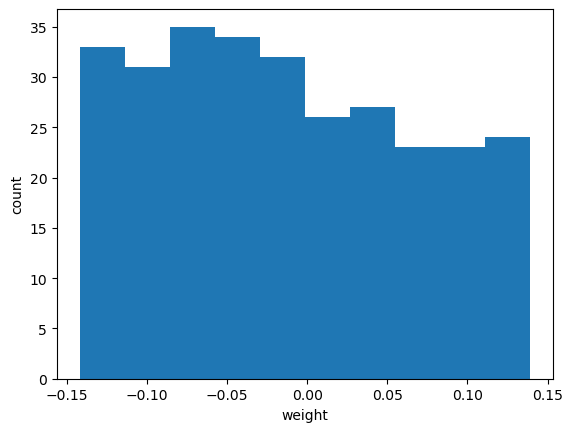

In [45]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

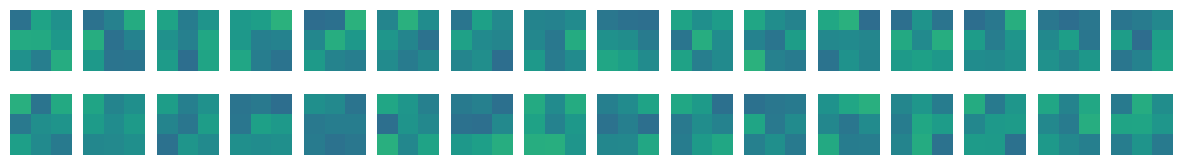

In [46]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis("off")
plt.show()

In [54]:
model.input

ValueError: The layer sequential has never been called and thus has no defined input.

In [53]:
conv_acti = keras.Model(model.input, model.layers[0].output)

ValueError: The layer sequential has never been called and thus has no defined input.

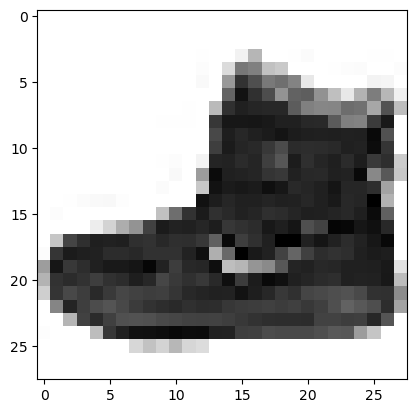

In [57]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap="gray_r")
plt.show()

In [51]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

ValueError: Input 0 of layer "functional_11" is incompatible with the layer: expected shape=(None, 784, 1), found shape=(1, 28, 28)